Fikko Muharavid Y. M.
(21051214004)

---

Kelas   : SI 2021B

---

Dataset Bakery

# **Analisis Sentiment**

In [1]:
!pip install google-play-scraper

In [2]:
from google_play_scraper import app
import pandas as pd
import numpy as np

In [3]:
#Scraping
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.FishingPlanetLLC.FishingPlanet',
    lang='id',  # Scraping ulasan aplikasi fising planet yang berada di google play store
    country='id', # Setting bahasa menjadi bahasa indonesia
    sort=Sort.MOST_RELEVANT, # Menggunakan most_relevan untuk mendapatkan ulasan yang paling relevant
    count=1500, # Jumlah ulasan yang diambil ada 1500
    filter_score_with=None # Filter_score yang digunakan adalah None untuk mengambil semua score atau ratting bintang 1 sampai 5
)

In [4]:
df_fisingplanet = pd.DataFrame(np.array(result),columns=['review'])
df_fisingplanet = df_fisingplanet.join(pd.DataFrame(df_fisingplanet.pop('review').tolist()))
df_fisingplanet.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,f5b849e3-d376-48a9-955e-3d58f676d703,Daffa Pratama,https://play-lh.googleusercontent.com/a/ACg8oc...,"Untuk gameplay sudah cukup realistis, pengalam...",4,2,1.0.251,2023-11-19 11:20:06,None,NaT,1.0.251
1,b43a73e6-21ea-4c53-815d-12fbecc278e1,Anton Nugroho Sudanto,https://play-lh.googleusercontent.com/a-/ALV-U...,good game. Saran dan perbaikan: akun premium h...,5,33,1.0.271,2023-11-17 00:42:43,"Hello! Thank you, we have shared your feedback...",2023-11-17 12:37:56,1.0.271
2,788d8a00-9919-4c4b-9176-88c7ecd9c5aa,Hansen Gunawan,https://play-lh.googleusercontent.com/a/ACg8oc...,"Setelah update kondisi jaringan tambah buruk, ...",3,22,1.0.271,2023-11-17 04:17:36,Hello! For assistance with the issues you've c...,2023-11-17 12:38:58,1.0.271
3,8422b4ca-22ee-4bb6-8335-604571801cb8,Riandi Enriko,https://play-lh.googleusercontent.com/a/ACg8oc...,Min ini kenapa kok dak bisa login ke akun saya...,3,0,1.0.271,2023-11-19 04:06:03,None,NaT,1.0.271
4,7786a28e-8fed-42bb-816a-7edb52267b6e,Croyne日,https://play-lh.googleusercontent.com/a-/ALV-U...,"Gameplay sudah sangat bagus,adu mekanik sama i...",5,8,1.0.271,2023-11-18 10:41:02,None,NaT,1.0.271


In [5]:
# Urutan data berdasarkan ulasan terbaru

new_df = df_fisingplanet[['userName', 'score','at', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,userName,score,at,content
932,Abu sofyan Haris,5,2023-11-20 09:47:43,Not bad
807,Arzeta 31,5,2023-11-20 08:07:19,bagus
828,Nizam _Footx,5,2023-11-20 07:35:43,go ond
1159,dedi smulean,5,2023-11-20 06:01:11,Mohon di permudah misinya agar lebih banyak me...
1151,NOVAL abc,4,2023-11-20 05:53:33,"cukup lah, berharap ada perbaikan untuk mering..."


In [6]:
my_df=sorted_df[['content', 'score']]
# Menghapus kolom username & at

In [7]:
print(my_df)

                                                content  score
932                                             Not bad      5
807                                               bagus      5
828                                              go ond      5
1159  Mohon di permudah misinya agar lebih banyak me...      5
1151  cukup lah, berharap ada perbaikan untuk mering...      4
...                                                 ...    ...
1165  I hope there will be multiplayer the same as t...      5
519                              Tambahin map Indonesia      5
761                                   Pertama dapat apa      5
1158  I just love this game from PC, and on the way ...      5
475        Smoga bisa voice, supaya lebih asyik ngobrol      5

[1274 rows x 2 columns]


In [8]:
def pelabelan(score):
  if score < 3:
    return 'Negatif'
  elif score == 3 :
    return 'Netral'
  elif score > 3 :
    return 'Positif'
my_df['Label'] = my_df ['score'].apply(pelabelan)
my_df.head(50)

<ipython-input-8-674b4ca6ef3f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['Label'] = my_df ['score'].apply(pelabelan)


,content,score,Label
932,Not bad,5,Positif
807,bagus,5,Positif
828,go ond,5,Positif
1159,Mohon di permudah misinya agar lebih banyak me...,5,Positif
1151,"cukup lah, berharap ada perbaikan untuk mering...",4,Positif
259,Saya mengenal game ini sejak saya semester 5 d...,4,Positif
774,Tambahin fitur gyro saat strike jadi lebih rea...,4,Positif
786,Semoga update yang akan datang bisa on mic 😁,5,Positif
1136,"Kenapa akun saya tiba tiba hilang, pas mau mai...",1,Negatif
821,NICE GAME,5,Positif


In [9]:
# Menyimpan file
my_df.to_excel("scrapping_data_fishingplanet.xlsx", index = False)

In [10]:
!pip install nltk
!pip install sastrawi
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 3.5 MB/s eta 0:00:00


In [11]:
import pandas as pd
import nltk
import re
import string
import emoji
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt');

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [12]:
# Inisialisasi stemmer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [13]:
# Memuat data dari file Excel
file_path = 'scrapping_data_fishingplanet.xlsx'
my_df = pd.read_excel(file_path)

In [14]:
# Proses Cleaning

def remove_kata(comment):
  comment = comment.replace('\t', ' ').replace('\n', ' ').replace('\\u', ' ').replace('\\', '')
  comment = comment.encode('ascii', 'replace').decode('ascii')
  comment = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/S+)", " ", comment).split())
  return comment.replace("http://", " ").replace("https://", " ")

my_df['content'] = my_df['content'].apply(remove_kata)


def remove_angka(comment):
    return re.sub(r"\d+", " ", comment)

my_df['content'] = my_df['content'].apply(remove_angka)


def remove_punctuation(comment):
    return comment.translate(str.maketrans("", "", string.punctuation))

my_df['content'] = my_df['content'].apply(remove_punctuation)


def remove_whitespace_LT(comment):
    return comment.strip()

my_df['content'] = my_df['content'].apply(remove_whitespace_LT)


def remove_whitespace_multiple(comment):
    return re.sub('\s+', ' ', comment)

my_df['content'] = my_df['content'].apply(remove_whitespace_multiple)


def remove_single_char(comment):
    return re.sub(r"\b[a-zA-Z]\b", " ", comment)

my_df['content'] = my_df['content'].apply(remove_single_char)


print('Hasil Cleaning: \n')
print(my_df.head(50))

Hasil Cleaning: 

                                              content  score    Label
0                                             Not bad      5  Positif
1                                               bagus      5  Positif
2                                              go ond      5  Positif
3   Mohon di permudah misinya agar lebih banyak me...      5  Positif
4   cukup lah berharap ada perbaikan untuk meringa...      4  Positif
5   Saya mengenal game ini sejak saya semester di ...      4  Positif
6   Tambahin fitur gyro saat strike jadi lebih rea...      4  Positif
7          Semoga update yang akan datang bisa on mic      5  Positif
8   Kenapa akun saya tiba tiba hilang pas mau main...      1  Negatif
9                                           NICE GAME      5  Positif
10  Pengin main tp gamenya berat bgt Snapdragon An...      1  Negatif
11                                     FISH ON STRIKE      5  Positif
12                                             baguss      5  Positif
13

In [15]:
# Proses Case Folding

import re
import pandas as pd
def casefolding(comment):
    comment = comment.lower()
    comment = comment.strip()
    return comment
my_df['content'] = my_df['content'].apply(casefolding)
print('Hasil Case Folding: \n')
print(my_df.head(50))

Hasil Case Folding: 

                                              content  score    Label
0                                             not bad      5  Positif
1                                               bagus      5  Positif
2                                              go ond      5  Positif
3   mohon di permudah misinya agar lebih banyak me...      5  Positif
4   cukup lah berharap ada perbaikan untuk meringa...      4  Positif
5   saya mengenal game ini sejak saya semester di ...      4  Positif
6   tambahin fitur gyro saat strike jadi lebih rea...      4  Positif
7          semoga update yang akan datang bisa on mic      5  Positif
8   kenapa akun saya tiba tiba hilang pas mau main...      1  Negatif
9                                           nice game      5  Positif
10  pengin main tp gamenya berat bgt snapdragon an...      1  Negatif
11                                     fish on strike      5  Positif
12                                             baguss      5  Positi

In [16]:
my_df.to_excel('cleaning.xlsx', index=False)

data_fold = pd.read_excel('cleaning.xlsx')
print(data_fold.shape)
print(data_fold.head())

(1274, 3)
                                             content  score    Label
0                                            not bad      5  Positif
1                                              bagus      5  Positif
2                                             go ond      5  Positif
3  mohon di permudah misinya agar lebih banyak me...      5  Positif
4  cukup lah berharap ada perbaikan untuk meringa...      4  Positif


In [17]:
import string
import re

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [18]:
# Proses Tokenizing

import nltk
nltk.download('punkt')

def word_tokenize_wrapper(comment):
  return word_tokenize(comment)

my_df['content'] = my_df['content'].apply(word_tokenize_wrapper)

print('Hasil Tokenizing: \n')
print(my_df.head(20))

Hasil Tokenizing: 

                                              content  score    Label
0                                          [not, bad]      5  Positif
1                                             [bagus]      5  Positif
2                                           [go, ond]      5  Positif
3   [mohon, di, permudah, misinya, agar, lebih, ba...      5  Positif
4   [cukup, lah, berharap, ada, perbaikan, untuk, ...      4  Positif
5   [saya, mengenal, game, ini, sejak, saya, semes...      4  Positif
6   [tambahin, fitur, gyro, saat, strike, jadi, le...      4  Positif
7   [semoga, update, yang, akan, datang, bisa, on,...      5  Positif
8   [kenapa, akun, saya, tiba, tiba, hilang, pas, ...      1  Negatif
9                                        [nice, game]      5  Positif
10  [pengin, main, tp, gamenya, berat, bgt, snapdr...      1  Negatif
11                                 [fish, on, strike]      5  Positif
12                                           [baguss]      5  Positif


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
my_df.to_excel('tokenizing.xlsx', index=False)


data_token = pd.read_excel("tokenizing.xlsx")
print(data_token.shape)
print(data_token.head())

(1274, 3)
                                             content  score    Label
0                                     ['not', 'bad']      5  Positif
1                                          ['bagus']      5  Positif
2                                      ['go', 'ond']      5  Positif
3  ['mohon', 'di', 'permudah', 'misinya', 'agar',...      5  Positif
4  ['cukup', 'lah', 'berharap', 'ada', 'perbaikan...      4  Positif


In [20]:
# Proses Filtering/Stopword Removal

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

list_stopwords = stopwords.words('indonesian')

list_stopwords.extend(['yg', 'dg', 'rt', 'dgn', 'ny', 'anj', 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'jgn', 'ga', 'ok', 'bgt', 'banget', 'jg',
                       'gw','guys','gtu','fyi',
                       'iya','aja','sih','iyaa','tpi','udh','ga','ngga','nggak'
                       ,'yeeha','itu','ituu','tpi','giniii','kaan','pas',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nyesel', 'habis','download','iyaah',
                       'nanya','yaa','tcodtaf','ccq','google','yo','gada','gue','udah','blm','cakep','beneran','dah',
                       'sender','baru','lagi','maen','tbtb','woy','lagi','lg','lgi','njir','kocak','wkwk','naseh','nan',
                       'tcok','cok','nntn','sengaja','bru','titid','logig','ai','masalahkalo','sii','bagusadu',
                        ])

list_stopwords = set(list_stopwords)

def stopword_removal(comment):
    return [word for word in comment if word not in list_stopwords]

my_df['content'] = my_df['content'].apply(stopword_removal)
print('Hasil Filtering: \n')
print(my_df.head(30))

Hasil Filtering: 

                                              content  score    Label
0                                          [not, bad]      5  Positif
1                                             [bagus]      5  Positif
2                                           [go, ond]      5  Positif
3                  [mohon, permudah, misinya, reward]      5  Positif
4        [berharap, perbaikan, meringankan, gameplay]      4  Positif
5   [mengenal, game, semester, perkuliahan, menyad...      4  Positif
6   [tambahin, fitur, gyro, strike, realistis, per...      4  Positif
7                           [semoga, update, on, mic]      5  Positif
8    [akun, hilang, main, login, gmail, akun, dibuka]      1  Negatif
9                                        [nice, game]      5  Positif
10  [pengin, main, tp, gamenya, berat, snapdragon,...      1  Negatif
11                                 [fish, on, strike]      5  Positif
12                                           [baguss]      5  Positif
1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
my_df.to_excel('stopword.xlsx', index=False)

data_filter = pd.read_excel("stopword.xlsx")
print(data_filter.shape)
print(data_filter.head())

(1274, 3)
                                             content  score    Label
0                                     ['not', 'bad']      5  Positif
1                                          ['bagus']      5  Positif
2                                      ['go', 'ond']      5  Positif
3         ['mohon', 'permudah', 'misinya', 'reward']      5  Positif
4  ['berharap', 'perbaikan', 'meringankan', 'game...      4  Positif


In [22]:
# Proses Stemming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(document):
    return [stemmer.stem(term) for term in document]

my_df['content'] = my_df['content'].apply(stemming)
print(my_df['content'].head())

0                         [not, bad]
1                            [bagus]
2                          [go, ond]
3       [mohon, mudah, misi, reward]
4    [harap, baik, ringan, gameplay]
Name: content, dtype: object


In [23]:
my_df.to_excel('final_data_fishingplanet.xlsx', index=False)

datafinal = pd.read_excel("final_data_fishingplanet.xlsx")
print(datafinal.shape)
print(datafinal.head())

(1274, 3)
                                   content  score    Label
0                           ['not', 'bad']      5  Positif
1                                ['bagus']      5  Positif
2                            ['go', 'ond']      5  Positif
3     ['mohon', 'mudah', 'misi', 'reward']      5  Positif
4  ['harap', 'baik', 'ringan', 'gameplay']      4  Positif


In [24]:
# Proses TF-IDF

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

datafinal = pd.read_excel("final_data_fishingplanet.xlsx")
datafinal = datafinal.astype({'Label': 'category', 'content': 'string', 'score': 'int'})

tf = TfidfVectorizer()

text_tf = tf.fit_transform(datafinal['content'].astype('U'))

result = pd.DataFrame(text_tf.toarray(), columns=tf.get_feature_names_out()).join(datafinal['Label'])

print(result)

       aa  abai  abis  about  acara  acc  accidentally  account  actually  \
0     0.0   0.0   0.0    0.0    0.0  0.0           0.0      0.0       0.0   
1     0.0   0.0   0.0    0.0    0.0  0.0           0.0      0.0       0.0   
2     0.0   0.0   0.0    0.0    0.0  0.0           0.0      0.0       0.0   
3     0.0   0.0   0.0    0.0    0.0  0.0           0.0      0.0       0.0   
4     0.0   0.0   0.0    0.0    0.0  0.0           0.0      0.0       0.0   
...   ...   ...   ...    ...    ...  ...           ...      ...       ...   
1269  0.0   0.0   0.0    0.0    0.0  0.0           0.0      0.0       0.0   
1270  0.0   0.0   0.0    0.0    0.0  0.0           0.0      0.0       0.0   
1271  0.0   0.0   0.0    0.0    0.0  0.0           0.0      0.0       0.0   
1272  0.0   0.0   0.0    0.0    0.0  0.0           0.0      0.0       0.0   
1273  0.0   0.0   0.0    0.0    0.0  0.0           0.0      0.0       0.0   

       ad  ...  yaitutombol  yak  yan  yee  yes  yet  you  your  yyuu    La

In [25]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer

# Membaca data dari file Excel
datafinal = pd.read_excel("final_data_fishingplanet.xlsx")

# Memisahkan fitur dan label
X = datafinal['content']
y = datafinal['Label']

# Pembagian data 80:20 untuk pembelajaran dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mengubah teks menjadi vektor fitur
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Algoritma Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)
y_pred_nb = nb.predict(X_test_vec)

# Algoritma Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_vec, y_train)
y_pred_rf = rf.predict(X_test_vec)

# Mengukur kinerja Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

# Mengukur kinerja Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Menampilkan hasil kinerja Naive Bayes
print("Naive Bayes:")
print("Akurasi (80:20):", accuracy_nb)
print("Presisi (80:20):", precision_nb)
print("Recall (80:20):", recall_nb)
print("F1 Score (80:20):", f1_nb)

# Menampilkan hasil kinerja Random Forest
print("\nRandom Forest:")
print("Akurasi (80:20):", accuracy_rf)
print("Presisi (80:20):", precision_rf)
print("Recall (80:20):", recall_rf)
print("F1 Score (80:20):", f1_rf)


Naive Bayes:
Akurasi (80:20): 0.7215686274509804
Presisi (80:20): 0.6263876259309402
Recall (80:20): 0.7215686274509804
F1 Score (80:20): 0.6638510620959129

Random Forest:
Akurasi (80:20): 0.6980392156862745
Presisi (80:20): 0.6095157427419825
Recall (80:20): 0.6980392156862745
F1 Score (80:20): 0.6431284950457538


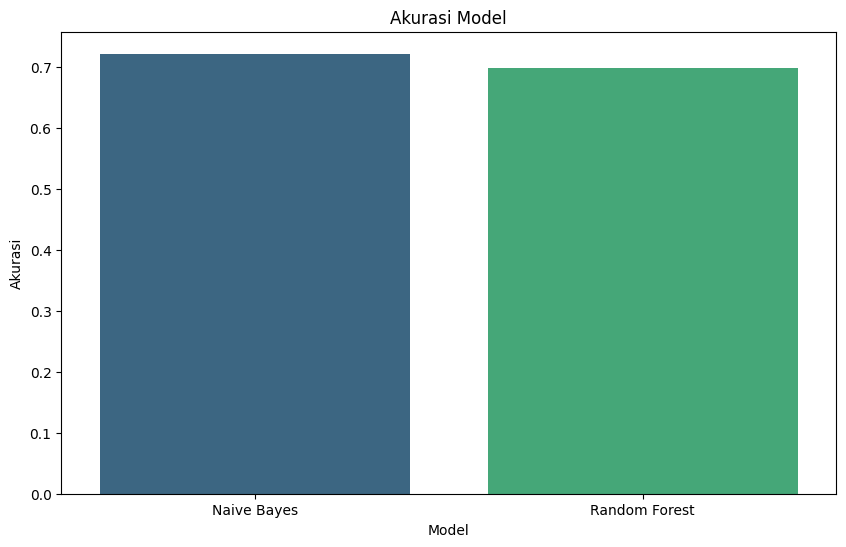

In [28]:
# Visualisasi performa model
performance_data = {
    'Model': ['Naive Bayes', 'Random Forest'],
    'Akurasi': [accuracy_nb, accuracy_rf],
    'Presisi': [precision_nb, precision_rf],
    'Recall': [recall_nb, recall_rf],
    'F1 Score': [f1_nb, f1_rf]
}

performance_df = pd.DataFrame(performance_data)

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Akurasi', data=performance_df, palette='viridis')
plt.title('Akurasi Model')
plt.ylabel('Akurasi')
plt.show()


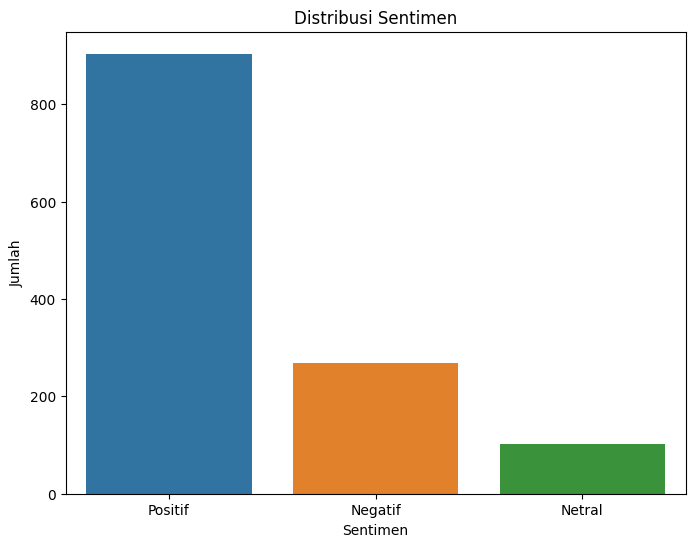

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi sentimen
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=datafinal)
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()


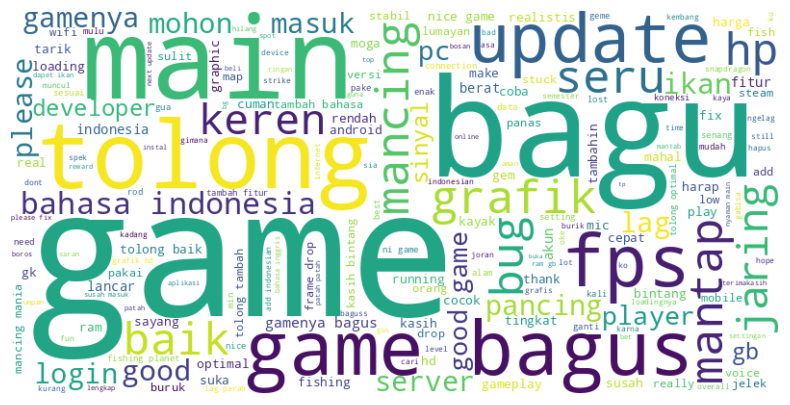

In [41]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Membaca data dari file Excel
wordcloud = pd.read_excel("final_data_fishingplanet.xlsx")

# Menggabungkan semua kata-kata dalam satu string
text = ' '.join(wordcloud['content'])

# Menggunakan daftar stop words dari NLTK
stop_words = set(stopwords.words('indonesian'))
stop_words.update(['aku', 'gue', 'gw', 'lagi', 'bagu', 'yang', 'yg', 'di', 'tapi', 'tp', 'padahal',
                   'pdhl', 'sama', 'dan', 'mau', 'atau', 'iya', 'ya', 'ngga', 'ga', 'nya', 'banget', 'bgt', 'aja', 'sama',
                   'kak', 'terus', 'kok', 'kalo', 'harus', 'lagi', 'lg', 'lo', 'lu', 'jadi', 'jd', 'cuma', 'hampir', 'kalian',
                   'kaya', 'ke', 'kek', 'tau', 'ternyata', 'itu', 'dari', 'ada', 'udah', 'dengan', 'bjr', 'eh', 'w', 'ni',
                   'trs', 'sampe', 'tuh', 'kayak', 'masih', 'mereka', 'kalo', 'di', 'nya', 'ini', 'atau', 'km', 'bbh', '_', 'ya', 'cm','bagu'])

# Menghapus stop words dari teks
filtered_text = ' '.join(word for word in text.split() if word.lower() not in stop_words)

# Menghapus karakter tanda kutip tunggal
filtered_text = filtered_text.replace("'", "")

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Tampilkan WordCloud dengan matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
